**Created by Gael AHOUANVOEDO**

**🚀 Students Performance 📊 Kaggle 📈**

**22 June 2022**

# **<center><span style="color:#fd7b12;">🚀 STUDENTS PERFORMANCE 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

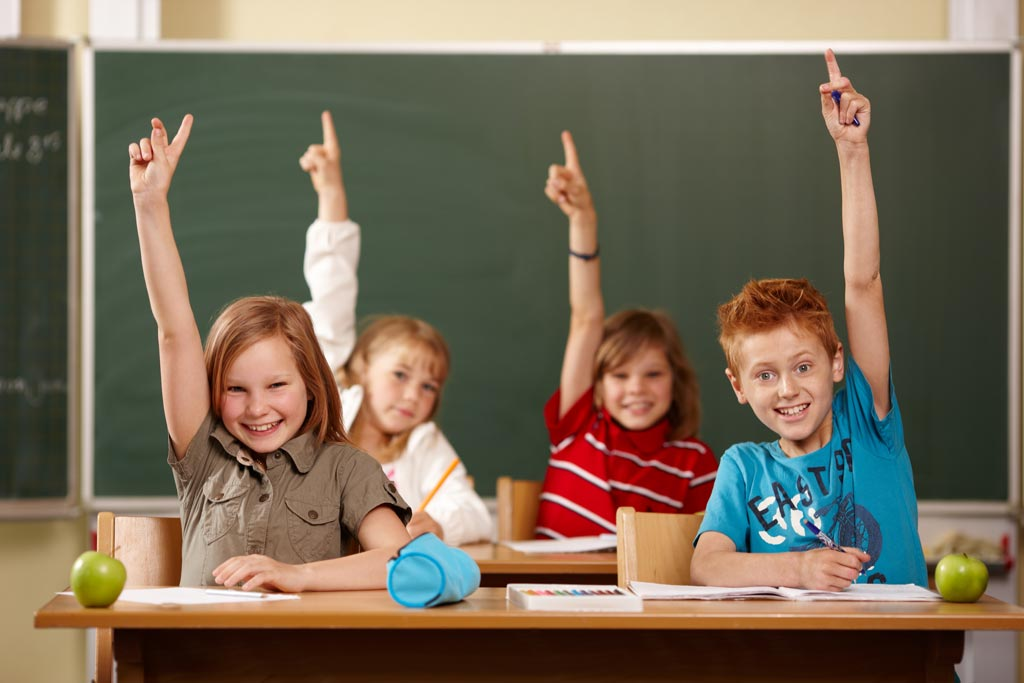

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Prediction](#5)
- [6. Conclusion](#6)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### In this project I will have to exploit a database on student performance

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

!pip install flaml

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

In [2]:
data= pd.read_csv('student_data.csv')
df = data.copy()

In [3]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
278,GP,F,18,U,GT3,T,4,4,health,health,...,2,4,4,1,1,4,15,9,8,8
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
284,GP,F,17,U,GT3,T,2,2,other,other,...,5,4,5,1,2,5,4,10,9,11
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0


### Firstly, we take a view on how many row and colummns we have

In [4]:
df.shape

(395, 33)

### And what about missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### It seems like we have no missing values, we can verify this with another function

In [6]:
df.isnull().sum().sum()

0

### Ok no missing values. We can observe the variables for identify the different data quality issues

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### We shoul have only two sex : Male or female so we could verify how many inique values we have

In [8]:
df.sex.nunique()

2

### For student I think, we can have maximum 25 years old. Any value up to this could be an typing error

In [9]:
df.age.max()

22

### Great!!! Mother Education and Father Education should have same classification group

In [10]:
df.Medu.unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [11]:
df.Fedu.unique()

array([4, 1, 2, 3, 0], dtype=int64)

### Now we will create a new variables who is the exam notes

In [12]:
df['exam'] = (df['G1']+df['G2']+df['G3'])/3

### An another one for the verdict of the exam

In [13]:
df['verdict'] =0

In [14]:
for i in  df['exam'].index:
    if df['exam'][i] >=10:
        df['verdict'][i] =1;
    else:
        df['verdict'][i] = 0;

In [15]:
df.verdict.unique()

array([0, 1], dtype=int64)

###  We have no information about many variables. We will remove all of them

In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'exam', 'verdict'],
      dtype='object')

In [17]:
df.drop(['address', 'Pstatus','reason',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc'], axis =1, inplace=True)

In [18]:
df.to_csv('dataset.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

### Set style values for all of our visualization

In [19]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('pastel')[0:5]

## School

In [20]:
df.school.nunique()

2

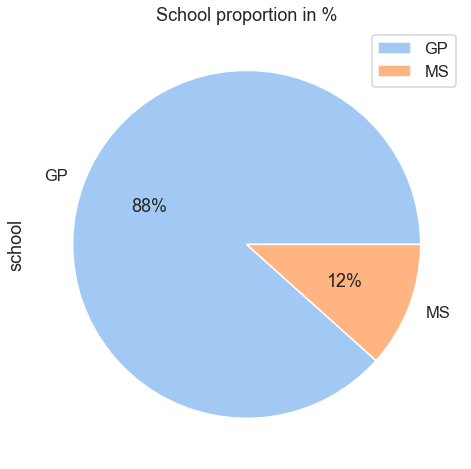

In [21]:
plt.figure(figsize=(10,8))
df.school.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('School proportion in %')
plt.legend()

> ### We have a dominance of GP School with 88% whether 22/25 school

## Sex

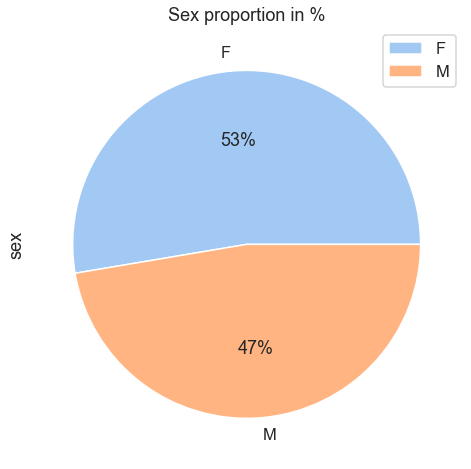

In [22]:
plt.figure(figsize=(10,8))
df.sex.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Sex proportion in %')
plt.legend()

> ### We have slight domination of woman. 

## Age

Text(0.5, 1.0, 'Age Distribution')

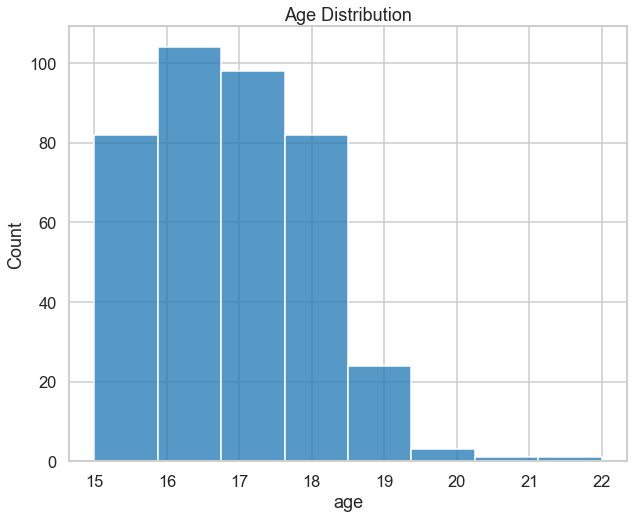

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='age', bins=8, palette = colors)
plt.title('Age Distribution')

> ### Our students are younger, between 15 and 18 years old, We also have somme old student in small numbers.

## Famsize

Text(0.5, 1.0, 'Size of family')

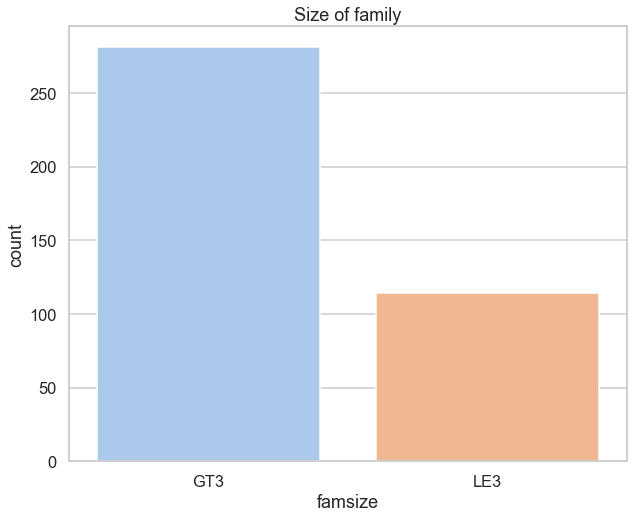

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='famsize', palette = colors, order = df.famsize.value_counts().index)
plt.title('Size of family')

> ### Think that GT3 is greater than 3 and LE3, less or equal to 3. So we have more students with more than 3 persons in there family

## Parents Educations

Text(0.5, 1.0, 'Father Education')

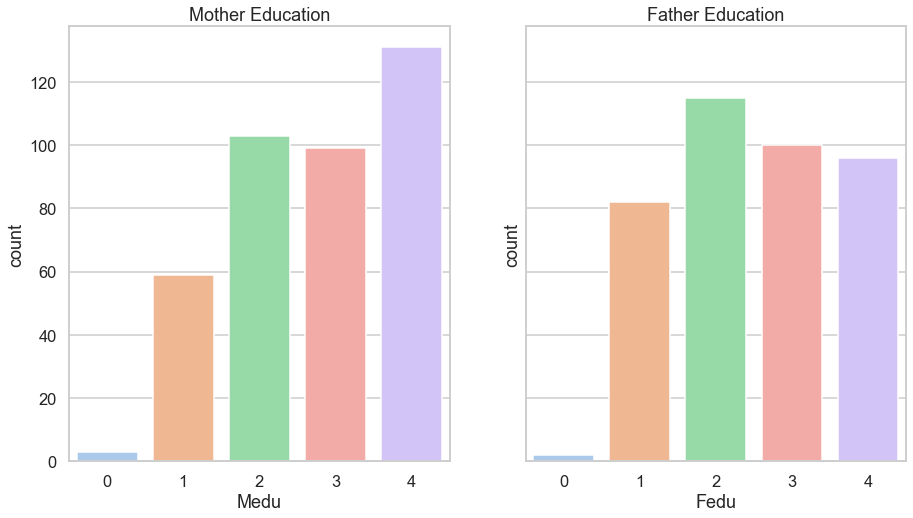

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', palette = colors)
axes[0].set_title('Mother Education')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', palette = colors)
axes[1].set_title('Father Education')

> ### Most of mothers, have a higher level of education and most of father have medium level of education. Whether it be mothers or fathers they are few to have 0 level of education.

## Parents Job

Text(0.5, 1.0, 'Father Job')

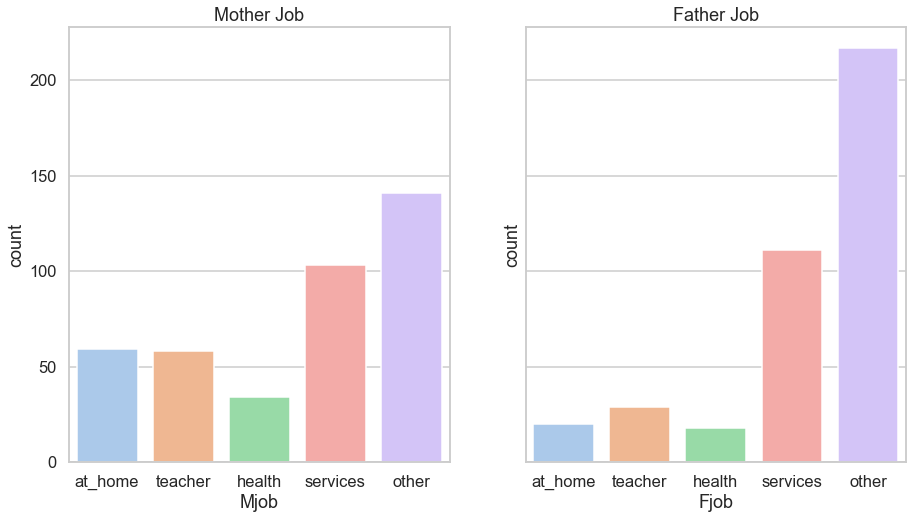

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = ['at_home','teacher','health','services','other']

# Mjob
sns.countplot(ax=axes[0], data = df, x='Mjob', palette = colors, order=order2)
axes[0].set_title('Mother Job')

# Fjob
sns.countplot(ax=axes[1], data = df, x='Fjob', palette = colors, order=order2)
axes[1].set_title('Father Job')

> ### Most of mother do services or oher jobs as same as father do.

## Guardian

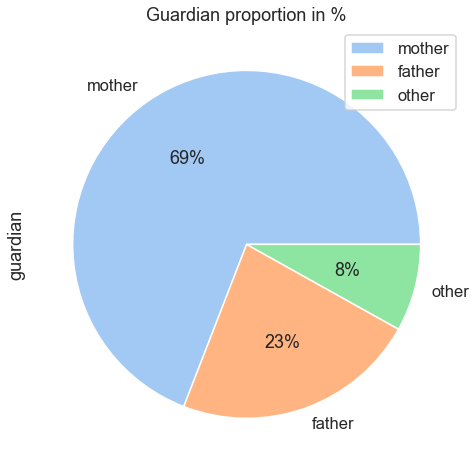

In [27]:
plt.figure(figsize=(10,8))
df.guardian.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('Guardian proportion in %')
plt.legend()

> ### In 69% of cases, it is the mother who is the guardian wheter 7 time in 10 

## Travel/Study time

Text(0.5, 1.0, 'Study time')

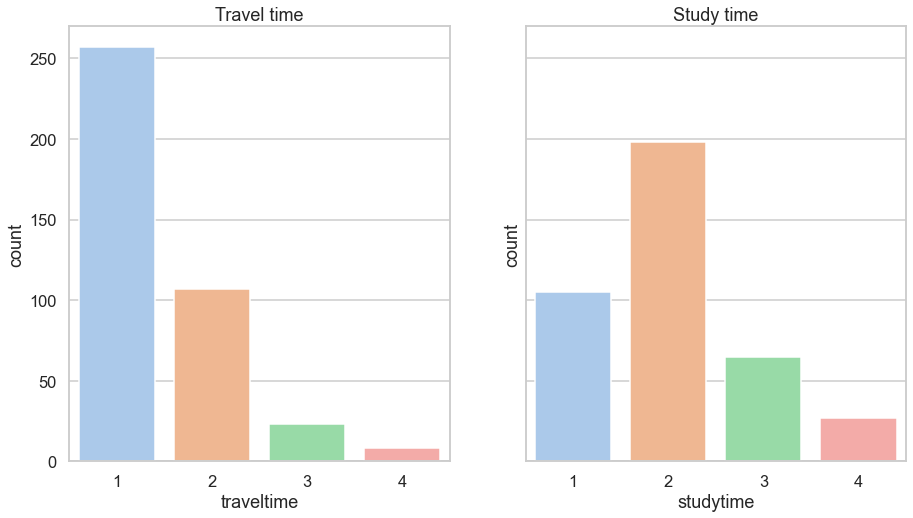

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = [1,2,3,4]

# Mjob
sns.countplot(ax=axes[0], data = df, x='traveltime', palette = colors, order=order2)
axes[0].set_title('Travel time')

# Fjob
sns.countplot(ax=axes[1], data = df, x='studytime', palette = colors, order=order2)
axes[1].set_title('Study time')

> ### The students of our dataset often 1 travel time and often 2 study time

## Health

Text(0.5, 1.0, 'Health')

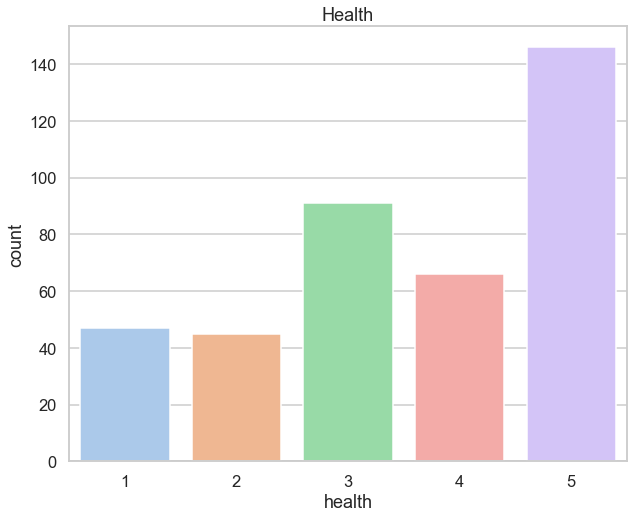

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='health', palette = colors)
plt.title('Health')

> ### Most of our students have a good health

## Absences

Text(0.5, 1.0, 'Absences Distributiion')

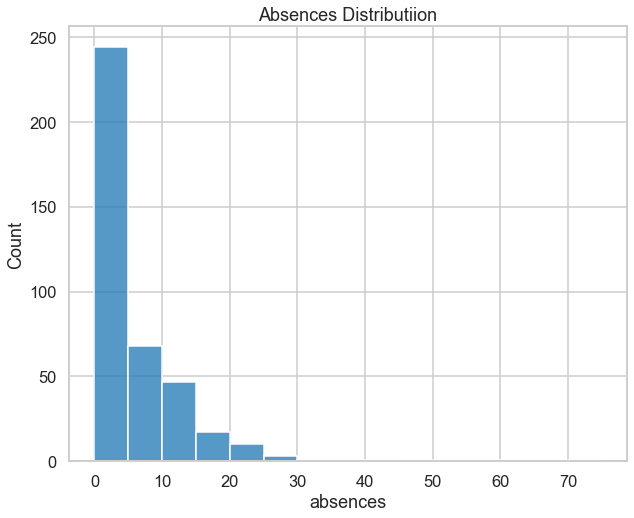

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='absences', bins=15, palette = colors)
plt.title('Absences Distributiion')

In [31]:
df.query('absences > 30')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
74,GP,F,16,GT3,3,3,other,services,mother,1,2,5,54,11,12,11,11.333333,1
183,GP,F,17,LE3,3,3,other,other,mother,1,2,1,56,9,9,8,8.666667,0
276,GP,F,18,GT3,3,2,other,services,mother,2,2,5,75,10,9,9,9.333333,0
307,GP,M,19,GT3,4,4,teacher,services,other,2,1,4,38,8,9,8,8.333333,0
315,GP,F,19,GT3,2,3,other,other,other,1,3,3,40,13,11,11,11.666667,1


> ### Students are a very little bit late. But we have 5 students, who are more late than usual.

## Grades

Text(0.5, 1.0, 'Grade 3 Distribution')

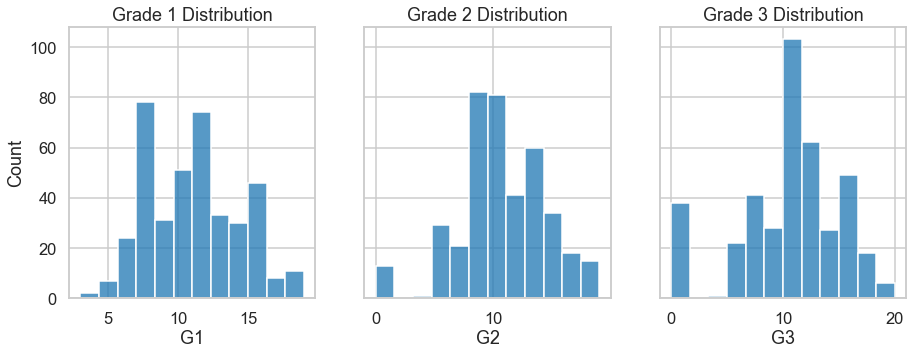

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15,5),sharey=True)

# G1
sns.histplot(ax=axes[0], data = df, x='G1', palette = colors, bins = 12)
axes[0].set_title('Grade 1 Distribution')

# G2
sns.histplot(ax=axes[1], data = df, x='G2', palette = colors, bins = 12)
axes[1].set_title('Grade 2 Distribution')

# G3
sns.histplot(ax=axes[2], data = df, x='G3', palette = colors, bins = 12)
axes[2].set_title('Grade 3 Distribution')

> ### Students are more succeed to subject 1 and 3. In Grade 2 and 3 we have students who have very poor score.

## Exam

Text(0.5, 1.0, 'Exam Distribution')

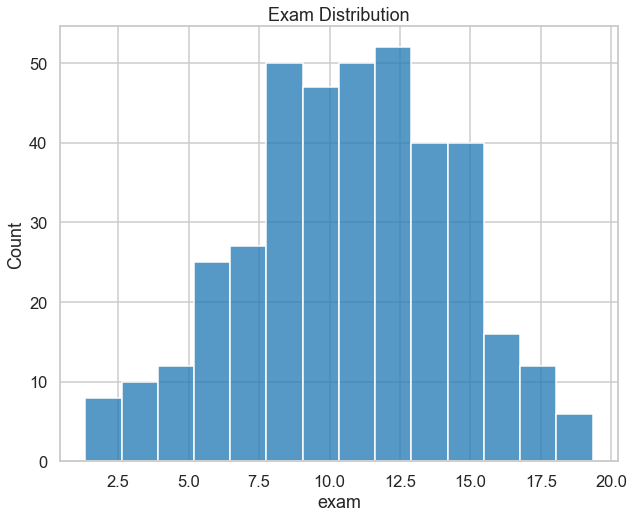

In [33]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='exam', palette = colors)
plt.title('Exam Distribution')

## Verdict

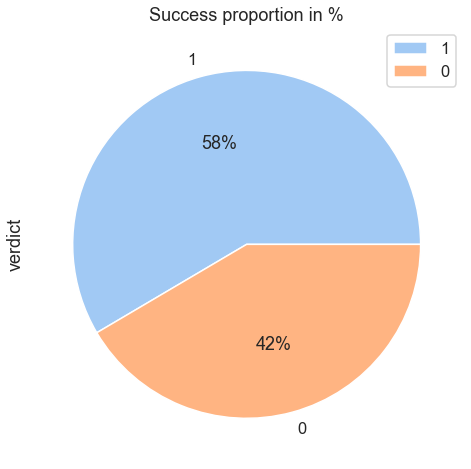

In [34]:
plt.figure(figsize=(10,8))
df.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

> ### By observing the distribution, we can see that we have more success than fail to the exam. 58% percent succeed and 42% failed. 

In [35]:
df.columns

Index(['school', 'sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'health', 'absences', 'G1', 'G2',
       'G3', 'exam', 'verdict'],
      dtype='object')

## Heatmap

Text(0.5, 1.0, 'Map of correlations')

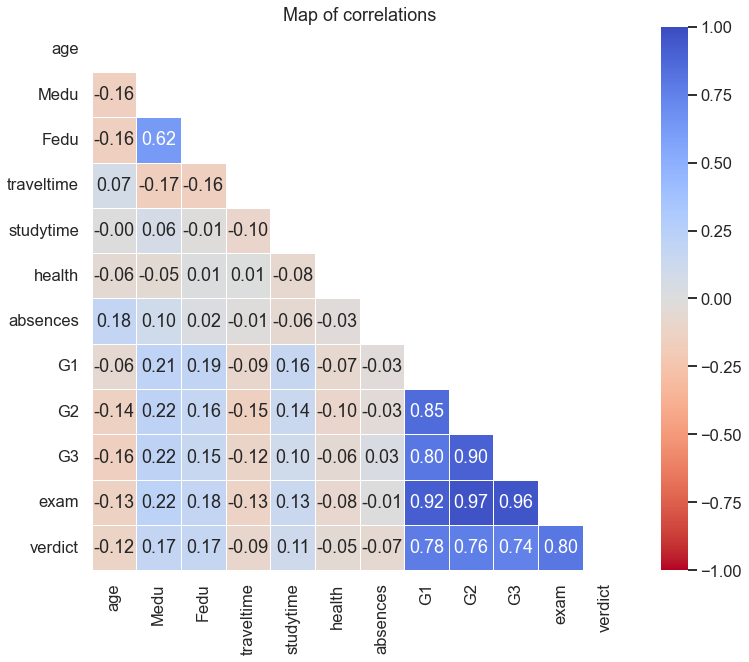

In [36]:
plt.figure(figsize = (12,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='coolwarm_r', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Map of correlations')

### Let's make a study on succeed  children

In [37]:
df_success = df.query('verdict==1')
df_success.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
69,GP,F,15,LE3,3,1,other,other,father,2,4,3,12,16,16,16,16.000000,1
31,GP,M,15,GT3,4,4,services,services,mother,2,2,5,0,17,16,17,16.666667,1
299,GP,M,18,LE3,4,4,teacher,teacher,mother,1,1,1,5,16,15,16,15.666667,1


In [38]:
df_success.describe(include='all')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
count,231,231,231.000000,231,231.000000,231.000000,231,231,231,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0
unique,2,2,NaN,2,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,M,NaN,GT3,NaN,NaN,other,other,mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,205,121,NaN,159,NaN,NaN,76,121,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.567100,NaN,2.909091,2.675325,NaN,NaN,NaN,1.393939,2.112554,3.493506,5.251082,13.082251,13.129870,13.281385,13.164502,1.0
std,NaN,NaN,1.209941,NaN,1.065447,1.068622,NaN,NaN,NaN,0.622588,0.872462,1.438206,6.627819,2.384221,2.297545,2.430521,2.258825,0.0
min,NaN,NaN,15.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,8.000000,9.000000,9.000000,10.000000,1.0
25%,NaN,NaN,16.000000,NaN,2.000000,2.000000,NaN,NaN,NaN,1.000000,2.000000,2.500000,0.000000,11.000000,11.000000,11.000000,11.333333,1.0
50%,NaN,NaN,16.000000,NaN,3.000000,3.000000,NaN,NaN,NaN,1.000000,2.000000,4.000000,4.000000,13.000000,13.000000,13.000000,12.666667,1.0
75%,NaN,NaN,17.000000,NaN,4.000000,4.000000,NaN,NaN,NaN,2.000000,3.000000,5.000000,8.000000,15.000000,15.000000,15.000000,14.666667,1.0


### `First thing to analyse is if man have more chance to succeed than woman`

### So we determine the proportion of success for each sex

In [39]:
df_Msex = df.query('sex=="M"').sample(187)

In [40]:
df_Fsex = df.query('sex=="F"').sample(187)

In [41]:
df_sex = df_Msex.append(df_Fsex)

Text(0.5, 1.0, 'Women students success %')

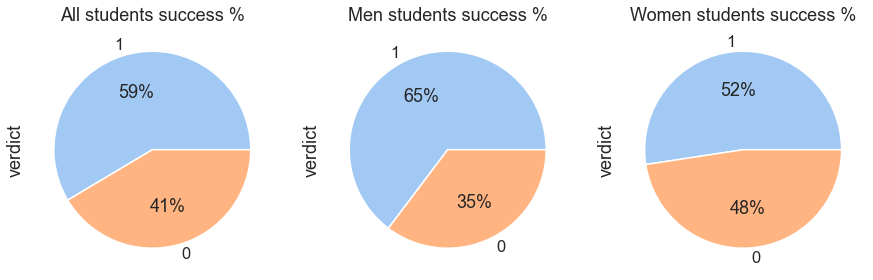

In [42]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

#sex
df_sex.verdict.value_counts().plot(ax=axes[0],kind='pie',colors=colors, autopct='%.0f%%')
axes[0].set_title('All students success %')

#Msex
df_Msex.verdict.value_counts().plot(ax=axes[1], kind='pie',colors=colors, autopct='%.0f%%')
axes[1].set_title('Men students success %')

#Fex
df_Fsex.verdict.value_counts().plot(ax=axes[2], kind='pie',colors=colors, autopct='%.0f%%')
axes[2].set_title('Women students success %')

> ### We observe that Men more succeed than women to the exam, 65% against 52%

### We can determine also the propability of Men and women to succeed

In [43]:
print(f'The probability of someone to succees and whether he be a men is : {df.verdict.mean()*df_Msex.verdict.mean()}')
print(f'The probability of someone to succees and whether he be a women is: {df.verdict.mean()*df_Fsex.verdict.mean()}')

The probability of someone to succees and whether he be a men is : 0.3784065524944155
The probability of someone to succees and whether he be a women is: 0.30647803425167536


> ### Here also we can observe that men have more probability to win than woman, 0.37 against 0.30

### Finally I will make a statistics test (t-test) with : 
-  Ho = Men and women have the same chance to succeed
-  H1 = Men have more chance to succeed than women

In [44]:
stats.ttest_ind(df_Msex.verdict, df_Fsex.verdict)

Ttest_indResult(statistic=2.426733440805161, pvalue=0.015709787480999264)

> ### The pvalue is inferior to 0.05 so we can reject the null hypothesis. So men have more chance to succeed than women

### `Now we will determinethe impact of age to succeed`

Text(0.5, 1.0, 'Age influence to exam score')

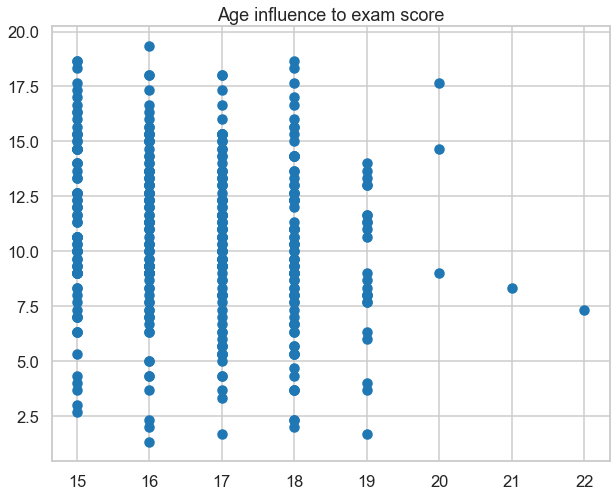

In [45]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.age, y=df.exam)
plt.title('Age influence to exam score')

In [46]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean(),df.query('age==20').exam.mean(),
                            df.query('age==21').exam.mean(),df.query('age==22').exam.mean(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median(),df.query('age==20').exam.median(),
                            df.query('age==21').exam.median(),df.query('age==22').exam.median(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])

Text(0.5, 0, 'Age')

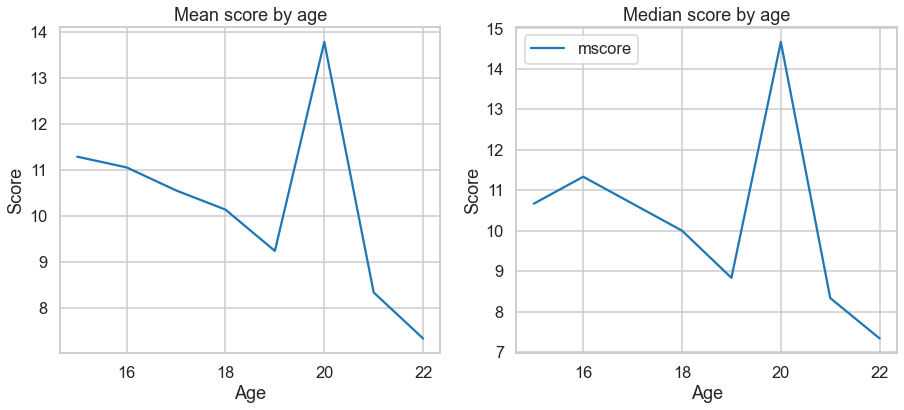

In [47]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')

axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')

> ### No matter the measure of center we take, we can observe that score discrease from 14 to 19 years old, make the highest pic at 20 and discrease again after 20. So let'us make a plot study by note consider the three students who are 20,21 and 22. They are only 5 for 385 students

Text(0.5, 0, 'Age')

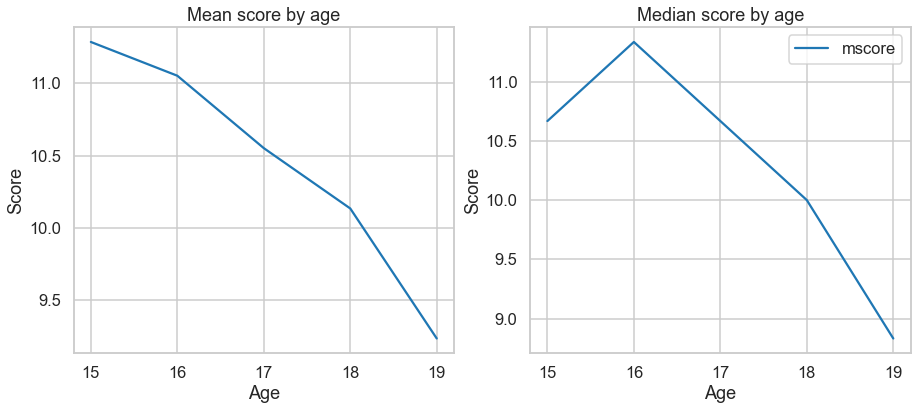

In [48]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean()
                            ],columns=['mscore'],index=[15,16,17,18,19])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median()
                            ],columns=['mscore'],index=[15,16,17,18,19])

fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')

> ### Here, we have a downward curve. So we can say that the score discrease with the age of students.

### Now, we will calcul the propability of someone to win for being young or old. Young student consider to have between 15 and 18 and old students more than 18

In [49]:
df_young = []
df_old = []

In [50]:
for i in df.index:
    if df['age'][i]<19:
        df_young.append(df['verdict'][i])
    else :
        df_old.append(df['verdict'][i])

In [51]:
df_young = pd.DataFrame(df_young, columns=['verdict'])
df_old = pd.DataFrame(df_old, columns=['verdict'])

In [52]:
df_old.shape[0]

29

In [53]:
for i in range(1,4):
    df_old = df_old.append(df_old)

In [54]:
df_old.shape[0]

232

In [55]:
print(f'The probability of someone to succees and whether he is young is : {df.verdict.mean()*df_young.verdict.mean()}')
print(f'The probability of someone to succees and whether he is old is : {df.verdict.mean()*df_old.verdict.mean()}')

The probability of someone to succees and whether he is young is : 0.3483295289479145
The probability of someone to succees and whether he is old is : 0.26215626364033173


> ### We can see that young people have a better probability to succeed.

### Finally I will make a statistics test (t-test) with : 
-  Ho = Young and old have the same chance to succeed
-  H1 = Young have better chance to succeed than women

In [56]:
stats.ttest_ind(df_young.verdict.sample(232), df_old.verdict.sample(232))

Ttest_indResult(statistic=2.8039074233295094, pvalue=0.005261382451516305)

> ### The pvalue is inferior to 0.05 so we can reject the null hypothesis. So young students have more chance to succeed than the olders

### `Is the level of education of parents influence the success of there child?`

Text(0.5, 1.0, 'Student success considering father education level')

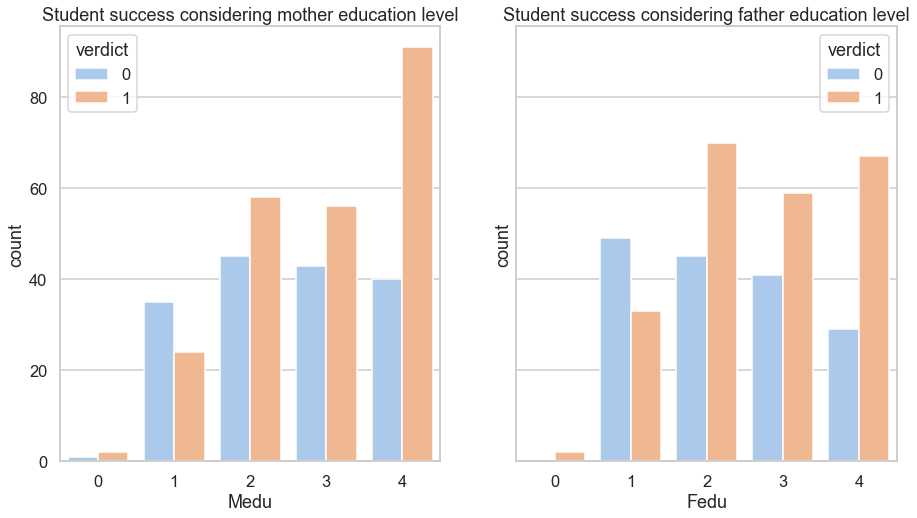

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', hue='verdict', palette = colors)
axes[0].set_title('Student success considering mother education level')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', hue='verdict', palette = colors)
axes[1].set_title('Student success considering father education level')

> ### Always, when the parents have a good level of education, (more than 1) the studend succeed. So, for well educated parents, students will succeed.

### `Having a teacher parents increase the chance to succeed?`

In [58]:
df_teacher = df.query('Mjob=="teacher" | Fjob== "teacher"')
df_teacher.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
148,GP,M,16,GT3,4,4,teacher,teacher,mother,1,1,5,0,7,6,0,4.333333,0
279,GP,M,18,LE3,4,3,teacher,services,mother,2,1,1,8,10,11,10,10.333333,1
37,GP,M,16,GT3,4,4,other,teacher,mother,2,3,5,7,15,16,15,15.333333,1


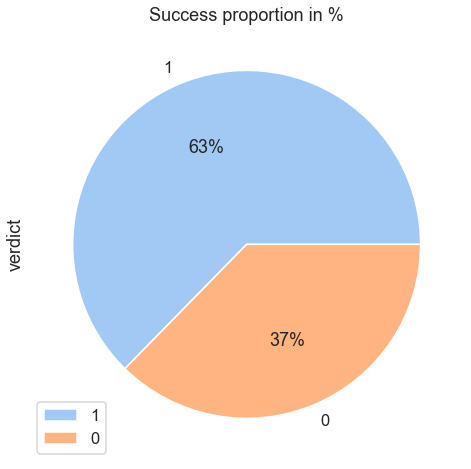

In [59]:
plt.figure(figsize=(10,8))
df_teacher.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

In [60]:
df_teacher = df.query('Mjob=="teacher" & Fjob== "teacher"')
df_teacher.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
329,GP,F,17,GT3,4,4,teacher,teacher,mother,2,3,4,4,14,14,14,14.000000,1
148,GP,M,16,GT3,4,4,teacher,teacher,mother,1,1,5,0,7,6,0,4.333333,0
139,GP,F,15,GT3,4,4,teacher,teacher,mother,2,1,5,0,16,16,15,15.666667,1


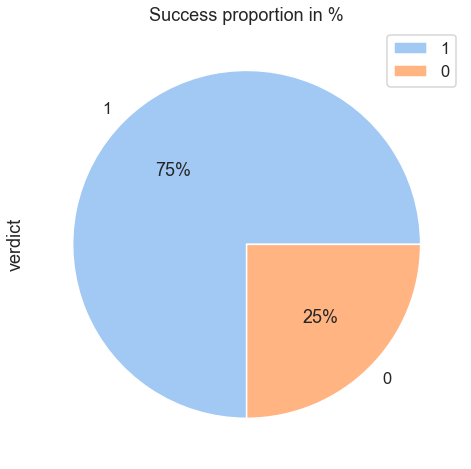

In [61]:
plt.figure(figsize=(10,8))
df_teacher.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

> ### Yes, having a teacher as a parents help to more succeed. If the two parents are teacher you will have even more chance to succeed

### `Influence of travel time for student to succeed`

Text(0.5, 1.0, 'Age influence to exam score')

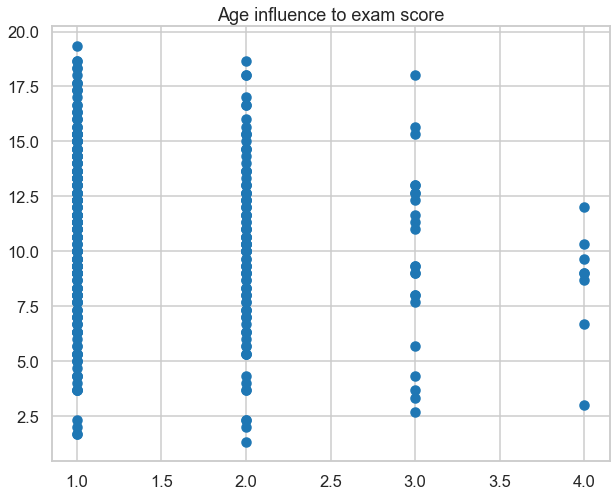

In [62]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.traveltime, y=df.exam)
plt.title('Age influence to exam score')

In [63]:
df_travel_exam1 = pd.DataFrame([df.query('traveltime==1').exam.mean(),df.query('traveltime==2').exam.mean(),
                            df.query('traveltime==3').exam.mean(),df.query('traveltime==4').exam.mean(),
                            ],columns=['mscore'],index=[1,2,3,4])


df_travel_exam2 = pd.DataFrame([df.query('traveltime==1').exam.median(),df.query('traveltime==2').exam.median(),
                            df.query('traveltime==3').exam.median(),df.query('traveltime==4').exam.median(),
                            ],columns=['mscore'],index=[1,2,3,4])


Text(0.5, 0, 'Traveltime')

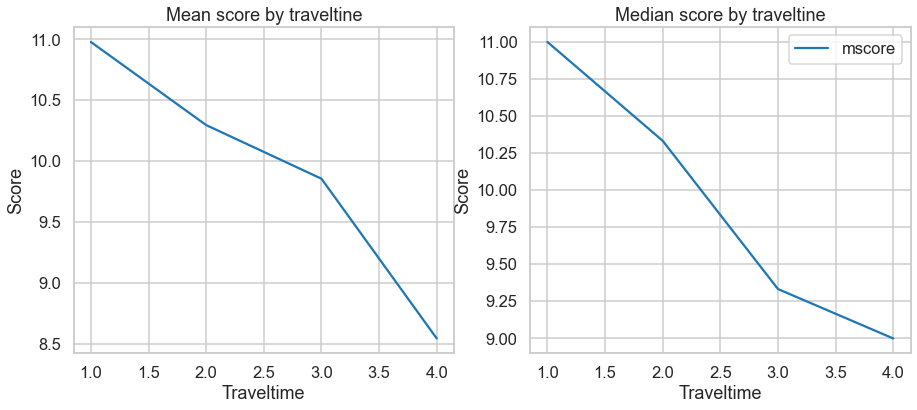

In [64]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_travel_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by traveltine')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Traveltime')

#median
df_travel_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by traveltine')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Traveltime')

> ### We observe that the score disgrease with the travel time. For success student have to reduce the travel time

<a id="5"></a>
# **<center><span style="color:#fd7b12;">Prediction </span></center>**

### After answering to questioons, we wan't know to create a model who can help us to predict the verdict. For make this we will delete the grade and exam variables

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import pickle

In [66]:
df.drop(['G1', 'G3','G3','exam',], axis =1, inplace=True)

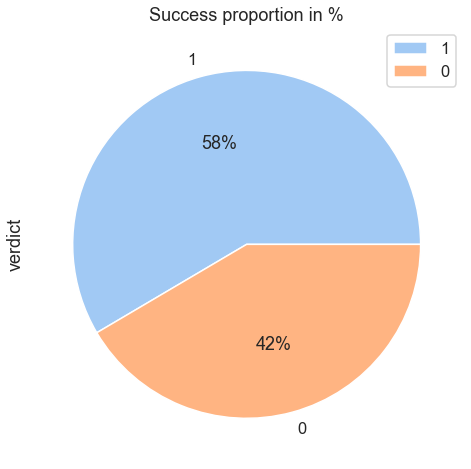

In [67]:
plt.figure(figsize=(10,8))
df.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

### We will equal the two proportions for not biais our study

In [68]:
seed = 111
X = df.drop('verdict', axis=1)
y = df['verdict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, 
                                                    random_state = seed, stratify=y_test)

In [69]:
X2 = X_train
X2['verdict'] = y_train.values

In [70]:
minority = X2[X2.verdict == 0]
majority = X2[X2.verdict == 1]
minority_upsampled = resample(minority, replace=True, n_samples = len(majority))

In [71]:
upsampled = pd.concat([majority, minority_upsampled])

In [72]:
X_train = upsampled.drop(['verdict'], axis=1)
y_train = upsampled['verdict']

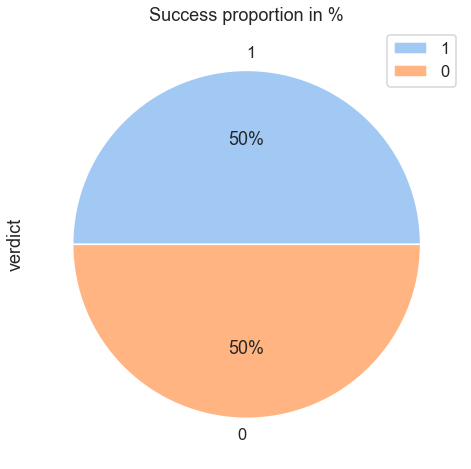

In [73]:
plt.figure(figsize=(10,8))
upsampled.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

### We have now the same proportion, 50/50. We will train two models with this and choose the best.

In [74]:
from flaml import AutoML
model1 = AutoML()
model1.fit(X_train, y_train, task="classification",metric='log_loss',time_budget=300)

[flaml.automl: 06-24 16:00:39] {2105} INFO - task = classification
[flaml.automl: 06-24 16:00:39] {2107} INFO - Data split method: stratified
[flaml.automl: 06-24 16:00:39] {2111} INFO - Evaluation method: cv
[flaml.automl: 06-24 16:00:39] {2188} INFO - Minimizing error metric: log_loss
[flaml.automl: 06-24 16:00:39] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 06-24 16:00:39] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-24 16:00:39] {2697} INFO - Estimated sufficient time budget=2711s. Estimated necessary time budget=67s.
[flaml.automl: 06-24 16:00:39] {2744} INFO -  at 0.5s,	estimator lgbm's best error=0.4414,	best estimator lgbm's best error=0.4414
[flaml.automl: 06-24 16:00:39] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 06-24 16:00:39] {2744} INFO -  at 0.8s,	estimator lgbm's best error=0.4414,	best estimator lgbm's best error=0.4414
[flaml.autom

[flaml.automl: 06-24 16:00:53] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 06-24 16:00:54] {2744} INFO -  at 14.9s,	estimator extra_tree's best error=0.4656,	best estimator lgbm's best error=0.0886
[flaml.automl: 06-24 16:00:54] {2567} INFO - iteration 37, current learner lgbm
[flaml.automl: 06-24 16:00:54] {2744} INFO -  at 15.1s,	estimator lgbm's best error=0.0886,	best estimator lgbm's best error=0.0886
[flaml.automl: 06-24 16:00:54] {2567} INFO - iteration 38, current learner lgbm
[flaml.automl: 06-24 16:00:54] {2744} INFO -  at 15.4s,	estimator lgbm's best error=0.0886,	best estimator lgbm's best error=0.0886
[flaml.automl: 06-24 16:00:54] {2567} INFO - iteration 39, current learner lgbm
[flaml.automl: 06-24 16:00:54] {2744} INFO -  at 15.7s,	estimator lgbm's best error=0.0826,	best estimator lgbm's best error=0.0826
[flaml.automl: 06-24 16:00:54] {2567} INFO - iteration 40, current learner lgbm
[flaml.automl: 06-24 16:00:55] {2744} INFO -  at 16.0s,	esti

[flaml.automl: 06-24 16:01:22] {2567} INFO - iteration 75, current learner xgboost
[flaml.automl: 06-24 16:01:25] {2744} INFO -  at 46.2s,	estimator xgboost's best error=0.1132,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:01:25] {2567} INFO - iteration 76, current learner lgbm
[flaml.automl: 06-24 16:01:25] {2744} INFO -  at 46.5s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:01:25] {2567} INFO - iteration 77, current learner lgbm
[flaml.automl: 06-24 16:01:25] {2744} INFO -  at 46.7s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:01:25] {2567} INFO - iteration 78, current learner catboost
[flaml.automl: 06-24 16:01:46] {2744} INFO -  at 67.8s,	estimator catboost's best error=0.1284,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:01:46] {2567} INFO - iteration 79, current learner lgbm
[flaml.automl: 06-24 16:01:47] {2744} INFO -  at 68.1s,	es

[flaml.automl: 06-24 16:02:16] {2567} INFO - iteration 113, current learner extra_tree
[flaml.automl: 06-24 16:02:17] {2744} INFO -  at 98.0s,	estimator extra_tree's best error=0.1936,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:02:17] {2567} INFO - iteration 114, current learner extra_tree
[flaml.automl: 06-24 16:02:17] {2744} INFO -  at 98.4s,	estimator extra_tree's best error=0.1595,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:02:17] {2567} INFO - iteration 115, current learner lgbm
[flaml.automl: 06-24 16:02:17] {2744} INFO -  at 98.6s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:02:17] {2567} INFO - iteration 116, current learner lgbm
[flaml.automl: 06-24 16:02:18] {2744} INFO -  at 98.9s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl: 06-24 16:02:18] {2567} INFO - iteration 117, current learner extra_tree
[flaml.automl: 06-24 16:02:18] {2744}

[flaml.automl: 06-24 16:02:32] {2567} INFO - iteration 150, current learner lgbm
[flaml.automl: 06-24 16:02:33] {2744} INFO -  at 114.6s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:33] {2567} INFO - iteration 151, current learner lgbm
[flaml.automl: 06-24 16:02:34] {2744} INFO -  at 114.9s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:34] {2567} INFO - iteration 152, current learner lgbm
[flaml.automl: 06-24 16:02:34] {2744} INFO -  at 115.2s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:34] {2567} INFO - iteration 153, current learner xgb_limitdepth
[flaml.automl: 06-24 16:02:34] {2744} INFO -  at 115.5s,	estimator xgb_limitdepth's best error=0.0854,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:34] {2567} INFO - iteration 154, current learner xgboost
[flaml.automl: 06-24 16:02:34] {2744} IN

[flaml.automl: 06-24 16:02:49] {2744} INFO -  at 130.7s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:49] {2567} INFO - iteration 188, current learner extra_tree
[flaml.automl: 06-24 16:02:50] {2744} INFO -  at 131.8s,	estimator extra_tree's best error=0.0944,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:50] {2567} INFO - iteration 189, current learner lgbm
[flaml.automl: 06-24 16:02:51] {2744} INFO -  at 132.1s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:51] {2567} INFO - iteration 190, current learner lgbm
[flaml.automl: 06-24 16:02:51] {2744} INFO -  at 132.4s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:02:51] {2567} INFO - iteration 191, current learner extra_tree
[flaml.automl: 06-24 16:02:52] {2744} INFO -  at 133.1s,	estimator extra_tree's best error=0.0941,	best estimator lgbm's best 

[flaml.automl: 06-24 16:03:31] {2744} INFO -  at 172.6s,	estimator rf's best error=0.0770,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:31] {2567} INFO - iteration 225, current learner lgbm
[flaml.automl: 06-24 16:03:31] {2744} INFO -  at 172.9s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:31] {2567} INFO - iteration 226, current learner rf
[flaml.automl: 06-24 16:03:32] {2744} INFO -  at 173.3s,	estimator rf's best error=0.0770,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:32] {2567} INFO - iteration 227, current learner rf
[flaml.automl: 06-24 16:03:33] {2744} INFO -  at 174.0s,	estimator rf's best error=0.0770,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:33] {2567} INFO - iteration 228, current learner lgbm
[flaml.automl: 06-24 16:03:33] {2744} INFO -  at 174.3s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 

[flaml.automl: 06-24 16:03:49] {2567} INFO - iteration 263, current learner rf
[flaml.automl: 06-24 16:03:49] {2744} INFO -  at 190.3s,	estimator rf's best error=0.0708,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:49] {2567} INFO - iteration 264, current learner lgbm
[flaml.automl: 06-24 16:03:49] {2744} INFO -  at 190.6s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:49] {2567} INFO - iteration 265, current learner lgbm
[flaml.automl: 06-24 16:03:49] {2744} INFO -  at 190.9s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:50] {2567} INFO - iteration 266, current learner xgboost
[flaml.automl: 06-24 16:03:50] {2744} INFO -  at 191.2s,	estimator xgboost's best error=0.0792,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:03:50] {2567} INFO - iteration 267, current learner xgboost
[flaml.automl: 06-24 16:03:50] {2744} INFO -  at 191.6s,	e

[flaml.automl: 06-24 16:04:05] {2744} INFO -  at 206.4s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:04:05] {2567} INFO - iteration 302, current learner lgbm
[flaml.automl: 06-24 16:04:05] {2744} INFO -  at 206.7s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:04:05] {2567} INFO - iteration 303, current learner lgbm
[flaml.automl: 06-24 16:04:06] {2744} INFO -  at 207.0s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:04:06] {2567} INFO - iteration 304, current learner extra_tree
[flaml.automl: 06-24 16:04:06] {2744} INFO -  at 207.5s,	estimator extra_tree's best error=0.0941,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:04:06] {2567} INFO - iteration 305, current learner lgbm
[flaml.automl: 06-24 16:04:06] {2744} INFO -  at 207.8s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565

[flaml.automl: 06-24 16:05:18] {2567} INFO - iteration 340, current learner lgbm
[flaml.automl: 06-24 16:05:18] {2744} INFO -  at 279.7s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:18] {2567} INFO - iteration 341, current learner xgboost
[flaml.automl: 06-24 16:05:19] {2744} INFO -  at 280.0s,	estimator xgboost's best error=0.0774,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:19] {2567} INFO - iteration 342, current learner lgbm
[flaml.automl: 06-24 16:05:19] {2744} INFO -  at 280.3s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:19] {2567} INFO - iteration 343, current learner lgbm
[flaml.automl: 06-24 16:05:19] {2744} INFO -  at 280.5s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:19] {2567} INFO - iteration 344, current learner lrl1
[flaml.automl: 06-24 16:05:19] {2744} INFO -  at 280.7s,	

[flaml.automl: 06-24 16:05:35] {2744} INFO -  at 296.0s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:35] {2567} INFO - iteration 379, current learner lgbm
[flaml.automl: 06-24 16:05:35] {2744} INFO -  at 296.3s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:35] {2567} INFO - iteration 380, current learner rf
[flaml.automl: 06-24 16:05:36] {2744} INFO -  at 297.0s,	estimator rf's best error=0.0708,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:36] {2567} INFO - iteration 381, current learner lgbm
[flaml.automl: 06-24 16:05:39] {2744} INFO -  at 300.1s,	estimator lgbm's best error=0.0565,	best estimator lgbm's best error=0.0565
[flaml.automl: 06-24 16:05:39] {2974} INFO - retrain lgbm for 0.1s
[flaml.automl: 06-24 16:05:39] {2981} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8359373204229645,
               learning_rate=0.4867626944935491,

In [75]:
print('Best Algorithm :', model1.best_estimator)
print('Best setup :', model1.best_config)

Best Algorithm : lgbm
Best setup : {'n_estimators': 18, 'num_leaves': 15, 'min_child_samples': 2, 'learning_rate': 0.4867626944935491, 'log_max_bin': 8, 'colsample_bytree': 0.8359373204229645, 'reg_alpha': 0.002376859370307539, 'reg_lambda': 0.5748412003205137}


In [76]:
print(classification_report(y_train, model1.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       139

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278



In [77]:
print(classification_report(y_val, model1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.96      0.93      0.95        46

    accuracy                           0.94        79
   macro avg       0.93      0.94      0.94        79
weighted avg       0.94      0.94      0.94        79



In [78]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.88      0.98      0.93        46

    accuracy                           0.91        79
   macro avg       0.92      0.90      0.91        79
weighted avg       0.92      0.91      0.91        79



In [79]:
y_pred=model1.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

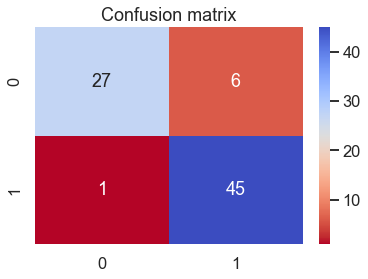

In [80]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
plt.title('Confusion matrix')

### For our second model we have 

In [81]:
from flaml import AutoML
model2 = AutoML()
model2.fit(X_train, y_train, task="classification",metric='f1',time_budget=300)

[flaml.automl: 06-24 16:05:40] {2105} INFO - task = classification
[flaml.automl: 06-24 16:05:40] {2107} INFO - Data split method: stratified
[flaml.automl: 06-24 16:05:40] {2111} INFO - Evaluation method: cv
[flaml.automl: 06-24 16:05:40] {2188} INFO - Minimizing error metric: 1-f1
[flaml.automl: 06-24 16:05:40] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 06-24 16:05:40] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-24 16:05:40] {2697} INFO - Estimated sufficient time budget=2631s. Estimated necessary time budget=65s.
[flaml.automl: 06-24 16:05:40] {2744} INFO -  at 0.4s,	estimator lgbm's best error=0.0478,	best estimator lgbm's best error=0.0478
[flaml.automl: 06-24 16:05:40] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 06-24 16:05:41] {2744} INFO -  at 0.6s,	estimator lgbm's best error=0.0478,	best estimator lgbm's best error=0.0478
[flaml.automl: 0

[flaml.automl: 06-24 16:05:52] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 06-24 16:05:54] {2744} INFO -  at 14.1s,	estimator extra_tree's best error=0.1803,	best estimator rf's best error=0.0371
[flaml.automl: 06-24 16:05:54] {2567} INFO - iteration 37, current learner rf
[flaml.automl: 06-24 16:05:56] {2744} INFO -  at 15.6s,	estimator rf's best error=0.0371,	best estimator rf's best error=0.0371
[flaml.automl: 06-24 16:05:56] {2567} INFO - iteration 38, current learner rf
[flaml.automl: 06-24 16:05:56] {2744} INFO -  at 16.0s,	estimator rf's best error=0.0371,	best estimator rf's best error=0.0371
[flaml.automl: 06-24 16:05:56] {2567} INFO - iteration 39, current learner lgbm
[flaml.automl: 06-24 16:05:56] {2744} INFO -  at 16.3s,	estimator lgbm's best error=0.0478,	best estimator rf's best error=0.0371
[flaml.automl: 06-24 16:05:56] {2567} INFO - iteration 40, current learner rf
[flaml.automl: 06-24 16:05:57] {2744} INFO -  at 16.6s,	estimator rf's best er

[flaml.automl: 06-24 16:07:05] {2744} INFO -  at 84.8s,	estimator xgboost's best error=0.0489,	best estimator catboost's best error=0.0291
[flaml.automl: 06-24 16:07:05] {2567} INFO - iteration 75, current learner extra_tree
[flaml.automl: 06-24 16:07:05] {2744} INFO -  at 85.4s,	estimator extra_tree's best error=0.0818,	best estimator catboost's best error=0.0291
[flaml.automl: 06-24 16:07:05] {2567} INFO - iteration 76, current learner rf
[flaml.automl: 06-24 16:07:06] {2744} INFO -  at 85.7s,	estimator rf's best error=0.0294,	best estimator catboost's best error=0.0291
[flaml.automl: 06-24 16:07:06] {2567} INFO - iteration 77, current learner rf
[flaml.automl: 06-24 16:07:06] {2744} INFO -  at 86.1s,	estimator rf's best error=0.0294,	best estimator catboost's best error=0.0291
[flaml.automl: 06-24 16:07:06] {2567} INFO - iteration 78, current learner extra_tree
[flaml.automl: 06-24 16:07:07] {2744} INFO -  at 86.4s,	estimator extra_tree's best error=0.0818,	best estimator catboost's

[flaml.automl: 06-24 16:08:42] {2744} INFO -  at 181.8s,	estimator lgbm's best error=0.0453,	best estimator catboost's best error=0.0250
[flaml.automl: 06-24 16:08:42] {2567} INFO - iteration 112, current learner extra_tree
[flaml.automl: 06-24 16:08:42] {2744} INFO -  at 182.1s,	estimator extra_tree's best error=0.0818,	best estimator catboost's best error=0.0250
[flaml.automl: 06-24 16:08:42] {2567} INFO - iteration 113, current learner extra_tree
[flaml.automl: 06-24 16:08:43] {2744} INFO -  at 182.5s,	estimator extra_tree's best error=0.0818,	best estimator catboost's best error=0.0250
[flaml.automl: 06-24 16:08:43] {2567} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 06-24 16:08:43] {2744} INFO -  at 182.8s,	estimator xgb_limitdepth's best error=0.0363,	best estimator catboost's best error=0.0250
[flaml.automl: 06-24 16:08:43] {2567} INFO - iteration 115, current learner xgb_limitdepth
[flaml.automl: 06-24 16:08:43] {2744} INFO -  at 183.1s,	estimator xgb_lim

[flaml.automl: 06-24 16:08:56] {2744} INFO -  at 196.3s,	estimator xgb_limitdepth's best error=0.0221,	best estimator xgb_limitdepth's best error=0.0221
[flaml.automl: 06-24 16:08:56] {2567} INFO - iteration 147, current learner rf
[flaml.automl: 06-24 16:08:57] {2744} INFO -  at 196.8s,	estimator rf's best error=0.0294,	best estimator xgb_limitdepth's best error=0.0221
[flaml.automl: 06-24 16:08:57] {2567} INFO - iteration 148, current learner rf
[flaml.automl: 06-24 16:08:57] {2744} INFO -  at 197.3s,	estimator rf's best error=0.0294,	best estimator xgb_limitdepth's best error=0.0221
[flaml.automl: 06-24 16:08:57] {2567} INFO - iteration 149, current learner rf
[flaml.automl: 06-24 16:08:58] {2744} INFO -  at 197.7s,	estimator rf's best error=0.0294,	best estimator xgb_limitdepth's best error=0.0221
[flaml.automl: 06-24 16:08:58] {2567} INFO - iteration 150, current learner lgbm
[flaml.automl: 06-24 16:08:58] {2744} INFO -  at 197.9s,	estimator lgbm's best error=0.0453,	best estimato

[flaml.automl: 06-24 16:10:38] {2567} INFO - iteration 182, current learner xgb_limitdepth
[flaml.automl: 06-24 16:10:38] {2744} INFO -  at 297.9s,	estimator xgb_limitdepth's best error=0.0219,	best estimator xgb_limitdepth's best error=0.0219
[flaml.automl: 06-24 16:10:38] {2567} INFO - iteration 183, current learner xgboost
[flaml.automl: 06-24 16:10:38] {2744} INFO -  at 298.2s,	estimator xgboost's best error=0.0448,	best estimator xgb_limitdepth's best error=0.0219
[flaml.automl: 06-24 16:10:38] {2567} INFO - iteration 184, current learner rf
[flaml.automl: 06-24 16:10:39] {2744} INFO -  at 298.5s,	estimator rf's best error=0.0294,	best estimator xgb_limitdepth's best error=0.0219
[flaml.automl: 06-24 16:10:39] {2567} INFO - iteration 185, current learner xgboost
[flaml.automl: 06-24 16:10:39] {2744} INFO -  at 298.8s,	estimator xgboost's best error=0.0448,	best estimator xgb_limitdepth's best error=0.0219
[flaml.automl: 06-24 16:10:39] {2567} INFO - iteration 186, current learner 

In [82]:
print('Best Algorithm :', model2.best_estimator)
print('Best setup :', model2.best_config)

Best Algorithm : lrl1
Best setup : {'C': 1.0}


In [83]:
print(classification_report(y_train, model2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       139
           1       0.95      0.94      0.95       139

    accuracy                           0.95       278
   macro avg       0.95      0.95      0.95       278
weighted avg       0.95      0.95      0.95       278



In [84]:
print(classification_report(y_val, model2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.93      0.89      0.91        46

    accuracy                           0.90        79
   macro avg       0.89      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



In [85]:
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.84      0.93      0.89        46

    accuracy                           0.86        79
   macro avg       0.87      0.85      0.85        79
weighted avg       0.86      0.86      0.86        79



In [86]:
y_pred=model2.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

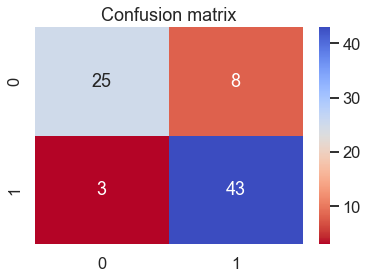

In [87]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
plt.title('Confusion matrix')

### Now, we will compare our two models for choose the best predictor

In [88]:
score_1 = (f1_score(y_test, model1.predict(X_test))+f1_score(y_val, model1.predict(X_val)))/2
score_2 = (f1_score(y_test, model2.predict(X_test))+f1_score(y_val, model2.predict(X_val)))/2

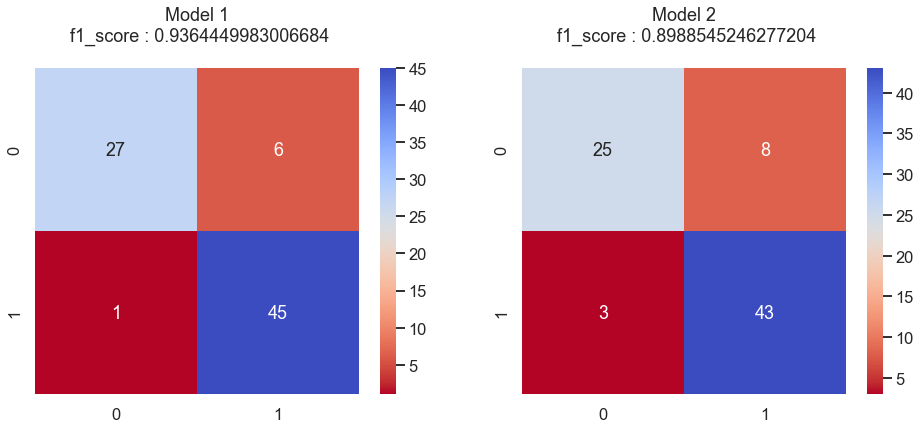

In [89]:
fig, axes =plt.subplots(1,2, figsize=([16,6]))

#model1
sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r',ax = axes[0])
axes[0].set_title(f'Model 1\n f1_score : {score_1}\n')

#model2
sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r',ax = axes[1])
axes[1].set_title(f'Model 2\n f1_score : {score_2}\n')
plt.show()

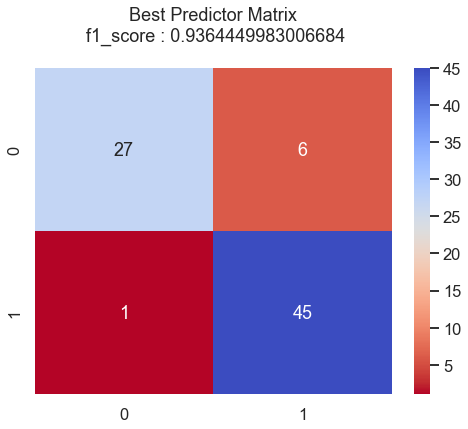

In [90]:
if score_1 > score_2:
    best_pred=model1.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_1}\n')
else :
    best_pred=model2.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_2}\n')

In [91]:
# Saving model to disk
pickle.dump(best_pred, open('model.pkl','wb'))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;">Conclusion </span></center>**

### `Did man have more chance to succeed than woman ?`

> ### Our analysis help us to say that men have more chance to succeed than women

### `What is the impact of age to succeed ?`

> ### As you get older, the chances of success decrease

### `Is the level of education of parents influence the success of there child ?`

> ### For well educated parents, child succeed

### `Having a teacher parents increase the chance to succeed ?`

> ### Yes, having a teacher as a parents help to more succeed. If the two parents are teacher we will have even more chance to succeed

### `Did travel time influence for student to succeed ?`

> ### The score disgrease with the travel time. SO the travel time reduce the chance to succeed

### `Prediction Models`

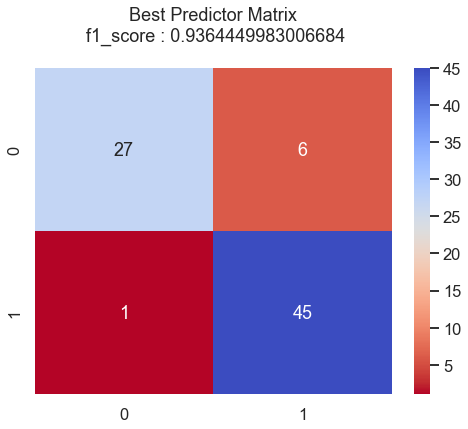

In [92]:
if score_1 > score_2:
    best_pred=model1.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_1}\n')
else :
    best_pred=model2.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_2}\n')

> ### The best predictor is save in our pkl file.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>